# Task 4

The next area of analysis is in regards to data collected from the hospital. First we will be defining the data, and explaining what some of the values mean. In the second portion we wil be analyzing. We clearity, we have divided up the dataset into three distinct sections; Precursor Data, Geographical Data, Variable Data. 

## Data Dictionary

### Precursor Data

Each patients arrives to the hospital in a given state. Each patient is assigned a gender, age, marital status, etc. These are data points which cannot be controlled by the hospital. Below is the data dictionary for this section.


| Name | Variable Type | Description |
| --- | --- | --- |
| gender | char | Gender expressed as M or F |
| age | integer | Age of patient expressed at integer |
| insurance | string | Self paid, Private, Medicaid or Medicare |
| religion | string | Self identified religion of patient |
| marital_status | string | Self identified stats (Divorced, Single, Married, etc) |
| ethnicity | string | Reorganized to Categories White, Black, Asian, Hispanic, Other and Unavailable |

---
 > Note : Originally ethnicity was expressed as subcategories ( eg. ASIAN - Chinese ). Little insight could be drawn from such small subdivision so it was opped to categorize them into broader categories. Unavailable has remained the same. 
---

### Positional Data

Each hospital is located in different parts of the United States, and will be pushed by different factors due to that location. Further more each patient will be inducted into different parts of the hospital. A patient entering emerge will have a different experience to those entering newborn. 

| Name | Variable Type | Description |
| --- | --- | --- |
| hadm_id | integer | Identifier for particular visit to hospital |
| admit_type | string | Categorized admission as - Emergency, Elective, Newborn Urgent |
| admit_location | string | Physical location the patient was admitted to (Ex. Transfer from HOSP/Extram) |

With this section of data we will look into patients records across time, and throughout different parts of the hospital. 


### Variable Data

This is data that in some way could change via workflow changes within the hospital, and as mistakes are made by staff. The number of labs for instance. It is possible that every hospital currently operates with the utmost efficiency with no wasted lab results. This is incredibly unlikely however, especially when excessive lab assessment's lengthen the stay of the patient. What will be shown later in this report is a statistical approach to which variables may be of higher importance to the length of each patients stay.

| Name | Variable Type | Description |
| --- | --- | --- |
| AdmitDiagnosis | string | Diagnosis upon admission |
| NumCallouts | integer | Number of clinicians *called out* of their working hours |
| NumDiagnosis| integer | Number of diagnoses |
| NumProcs         | float | ICD-9 Code Procedures|
| AdmitProcedure   | string | Procedure performed upon admission |
| NumCPTevents     | float | CPT Code labeled events |
| NumInput         | float| ICD-9 Code of inputs (e.g., fluids) |
| NumLabs          | float |ICD-9 Code of lab tests performed |
| NumMicroLabs     | float| ICD-9 of microbiology lab tests |
| NumNotes         | float| Number of clinical notes  |
| NumOutput        | float | ICD-9 Code of outputs (e.g., urine) |
| NumRx            | float | Number of prescribed medications |
| NumProcEvents    | float | ICD-9 Procedure Code |
| NumTransfers     | float | ### Transfer code |
| NumChartEvents   | float | #### |
| ExpiredHospital  | boolean | Whether the patient died in hospital |
| TotalNumInteract | float | number of interactions |

You will note the use of coding systems such as ICD-9. These codes are standardized by organization bodies such as the NIH and are used across hospitals.
For more information see [PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC3865615/#:~:text=The%20ICD%2D9%2DCM%20system,Diseases%20(ICD%2D9).)


## Analysis

### Precursor Data

Due to the fact that this data is prior to the patients arrival at the hospital, there is little that can be said for actionable results. Instead we will seek to understand more about the patient base.

#### Statistical Metrics



To summarize:
- Roughly 56% of patients identify as men while 44% identify as women
- The vast majority of patients identify with white 70%, 9% Black, 3.5% Hispanic, 3.3% Asian, 10% Unavailable, and 2% Other
    - Assume same distribution for Unavailable we get
    - +7 white, +0.9 black, +0.035 Hispanic, +0.033 Asain
- 35% of patients are Catholic, and 35% are not specified or null
- admit type, location, diagnosis, insurance
- 50% of people are married

Insights can be extracted from this dataset from a comparison to the average. Because this hospital operates in the United States, we compare the precursor data to data released by the United States Census Bueraum and [US Religion Census](https://www.usreligioncensus.org/sites/default/files/2023-10/2020_US_Religion_Census.pdf) [PEW](https://www.pewresearch.org/social-trends/2021/10/05/rising-share-of-u-s-adults-are-living-without-a-spouse-or-partner/) [USAFACTS](https://usafacts.org/articles/the-diverse-demographics-of-asian-americans/)

- US 57% White, 19% Hispanic, 12% Black, 7.1% Asian
- US is 49% men, 51% Women
- 38% Catholic, 48% Protestant, 1.3% in US, 4% Latter-day, 2% Jehovah's Witnesses
- 53% of people are married

# GO OFF OF [MIMIC Website](https://mimic.mit.edu/docs/iii/tables/admissions/)
EXTRAM - Expanded trauma

In [10]:
import pandas as pd

df = pd.read_csv('../data-p2/mimic3d.csv')


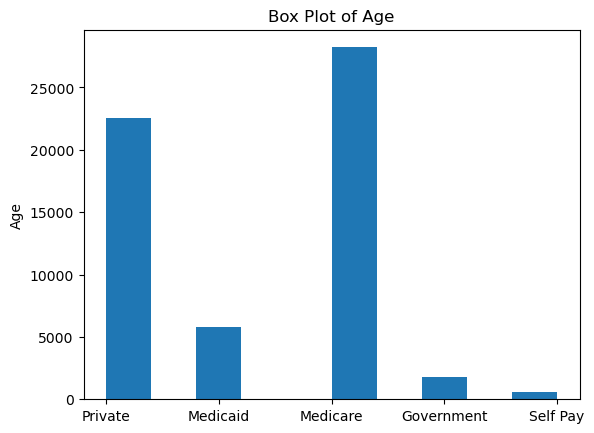

In [22]:
import matplotlib.pyplot as plt

# Create the box plot
plt.hist(df['insurance'].dropna())  # dropna() removes any NaN values
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Display the plot
plt.show()

In [34]:
df['NumDiagnosis'].value_counts()

NumDiagnosis
1.00     385
1.02     347
1.33     343
0.76     339
1.01     336
        ... 
16.80      1
21.74      1
7.18       1
20.48      1
76.00      1
Name: count, Length: 1259, dtype: int64

In [35]:
df['NumDiagnosis'].describe()

count    58976.00000
mean         2.67596
std          8.26559
min          0.00000
25%          0.82000
50%          1.41000
75%          2.40000
max        450.00000
Name: NumDiagnosis, dtype: float64

In [5]:
ethnicity_mapping = {
    "ASIAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - CAMBODIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - FILIPINO": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - OTHER": "ASIAN",
    "ASIAN - VIETNAMESE": "ASIAN",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "BLACK/HAITIAN": "BLACK",
    "CARIBBEAN ISLAND": "OTHER",
    "HISPANIC OR LATINO": "HISPANIC",
    "HISPANIC/LATINO - CUBAN": "HISPANIC",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC",
    "MIDDLE EASTERN": "OTHER",
    "MULTI RACE ETHNICITY": "OTHER",
    "OTHER": "OTHER",
    "PATIENT DECLINED TO ANSWER": "UNAVAILABLE",
    "PORTUGUESE": "OTHER",
    "SOUTH AMERICAN": "OTHER",
    "UNABLE TO OBTAIN": "UNAVAILABLE",
    "UNKNOWN/NOT SPECIFIED": "UNAVAILABLE",
    "WHITE": "WHITE",
    "WHITE - BRAZILIAN": "WHITE",
    "WHITE - EASTERN EUROPEAN": "WHITE",
    "WHITE - OTHER EUROPEAN": "WHITE",
    "WHITE - RUSSIAN": "WHITE"
}


df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

df['ethnicity'].value_counts('F')

ethnicity
WHITE          0.702758
UNAVAILABLE    0.100265
BLACK          0.097629
HISPANIC       0.035423
ASIAN          0.033943
OTHER          0.029981
Name: proportion, dtype: float64

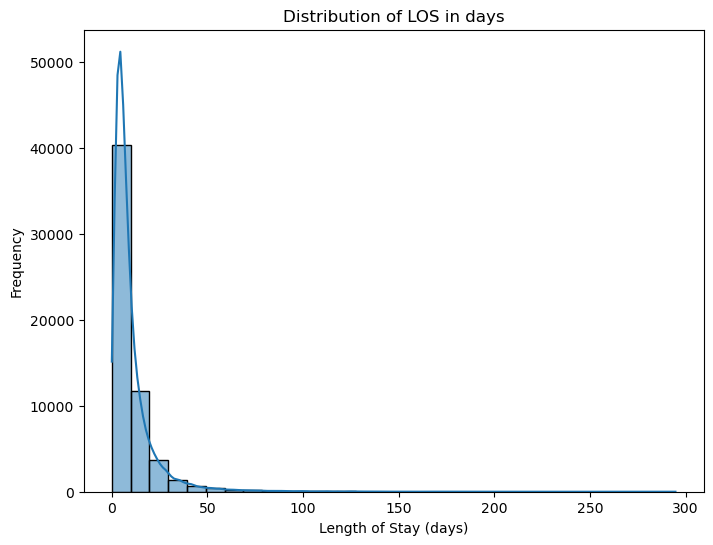

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['LOSdays'], bins=30, kde=True)
plt.title('Distribution of LOS in days')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Understanding the Rest of the Data

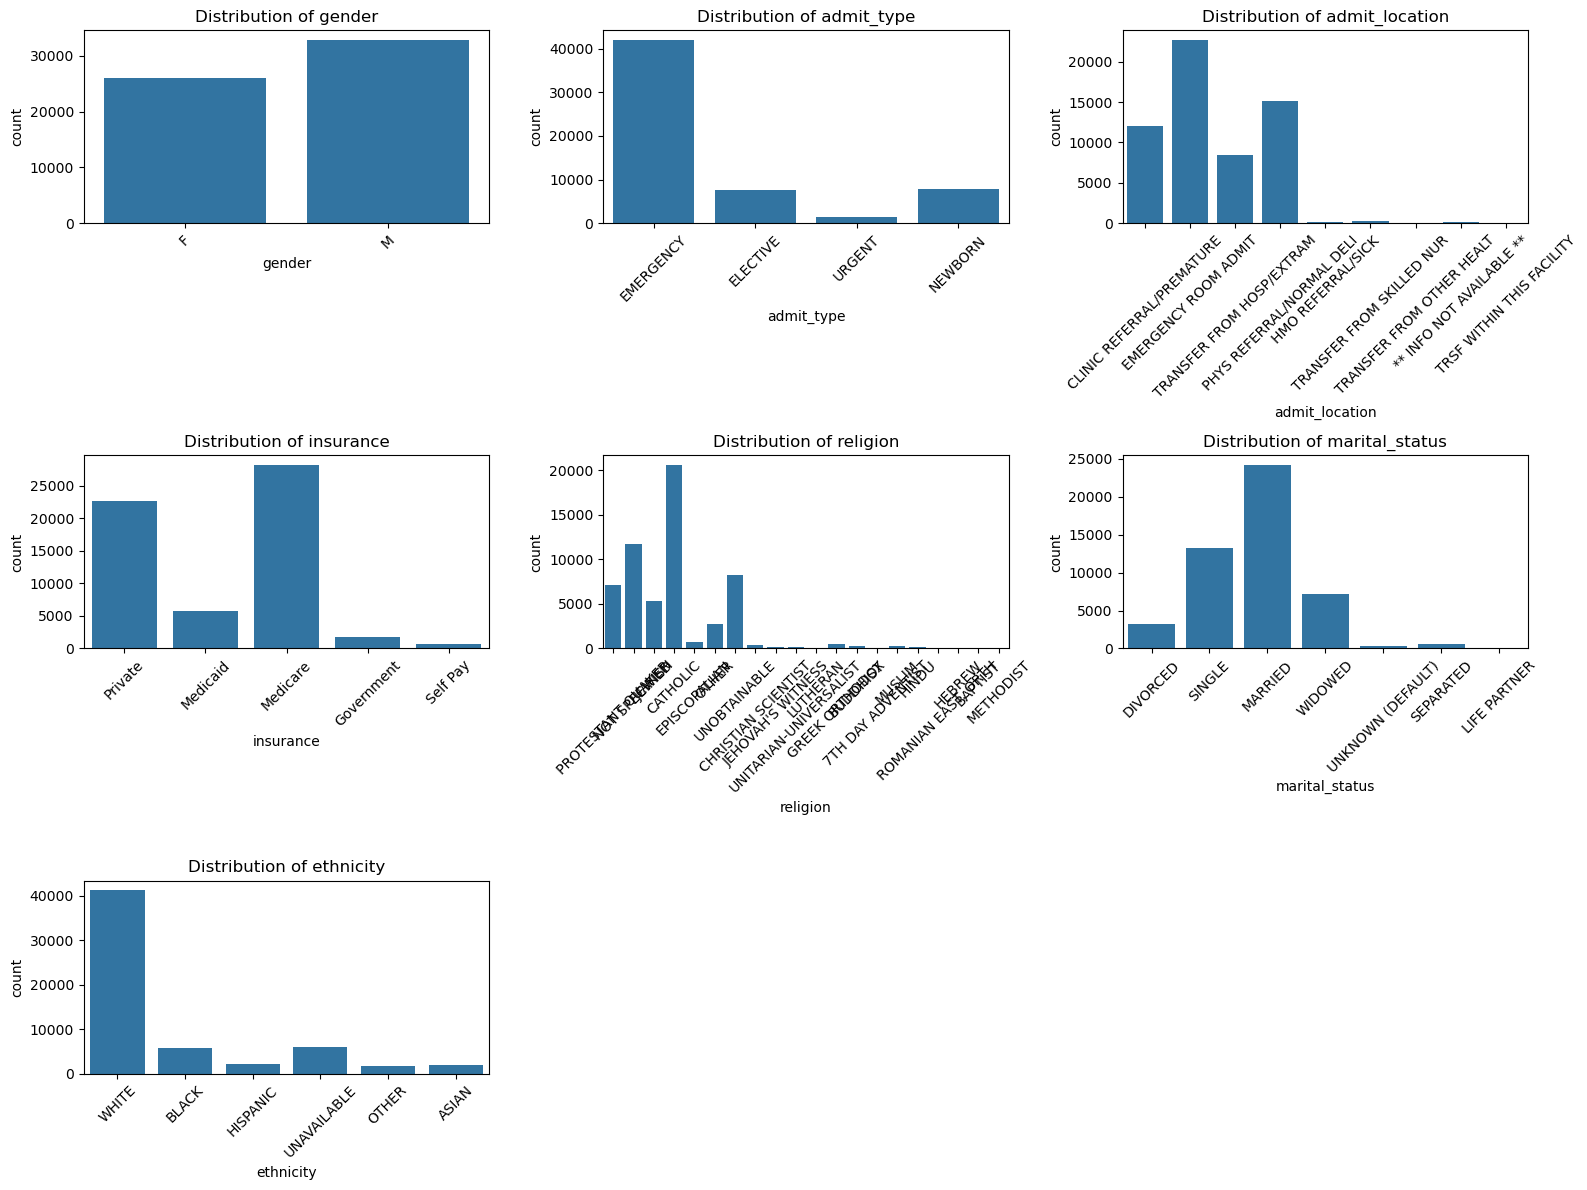

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot categorical variables
categorical_cols = ['gender', 'admit_type', 'admit_location', 'insurance', 'religion', 
                    'marital_status', 'ethnicity']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

ValueError: could not convert string to float: 'F'

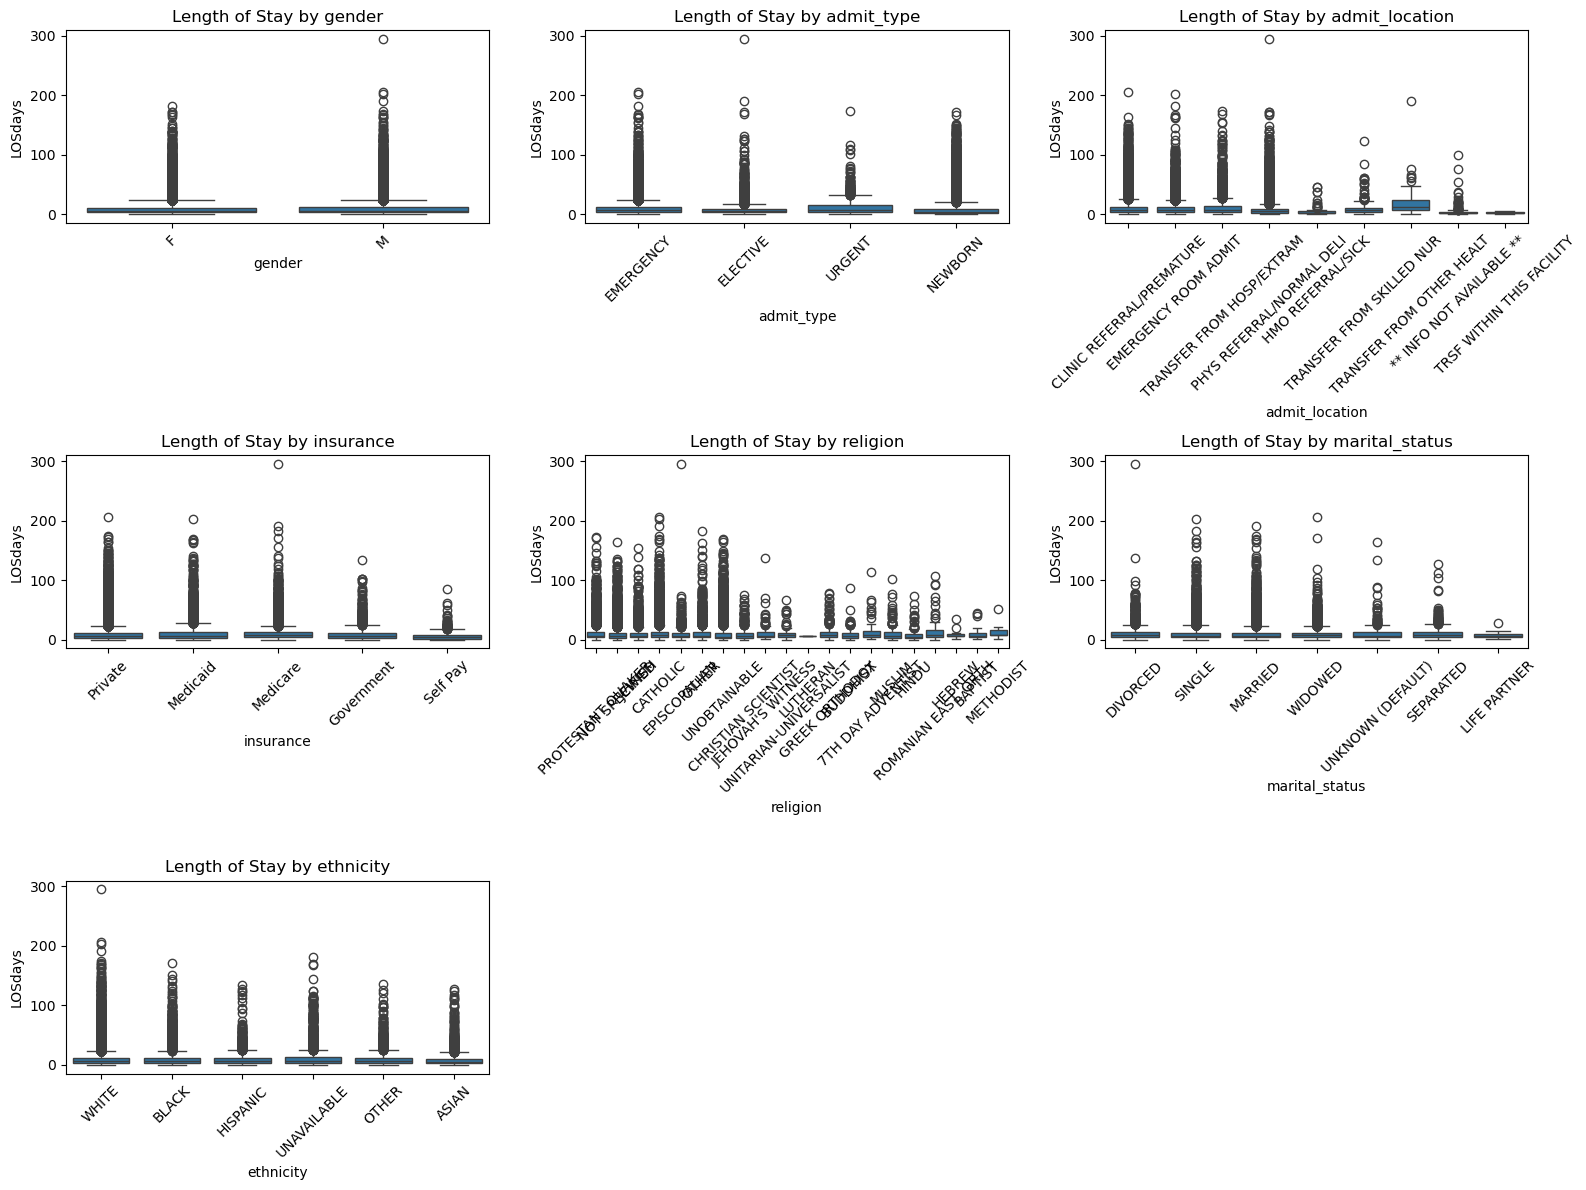

In [9]:
# Boxplots to visualize the relationship between categorical variables and LOSdays
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='LOSdays', data=df)
    plt.title(f'Length of Stay by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


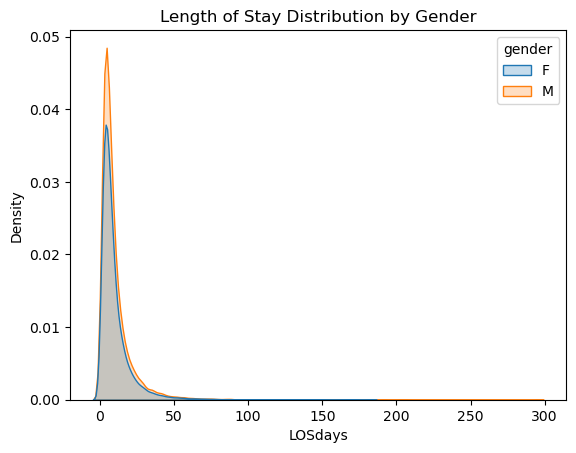

In [15]:
# KDE plots to visualize LOSdays distribution by gender
sns.kdeplot(data=df, x='LOSdays', hue='gender', fill=True)
plt.title('Length of Stay Distribution by Gender')
plt.show()

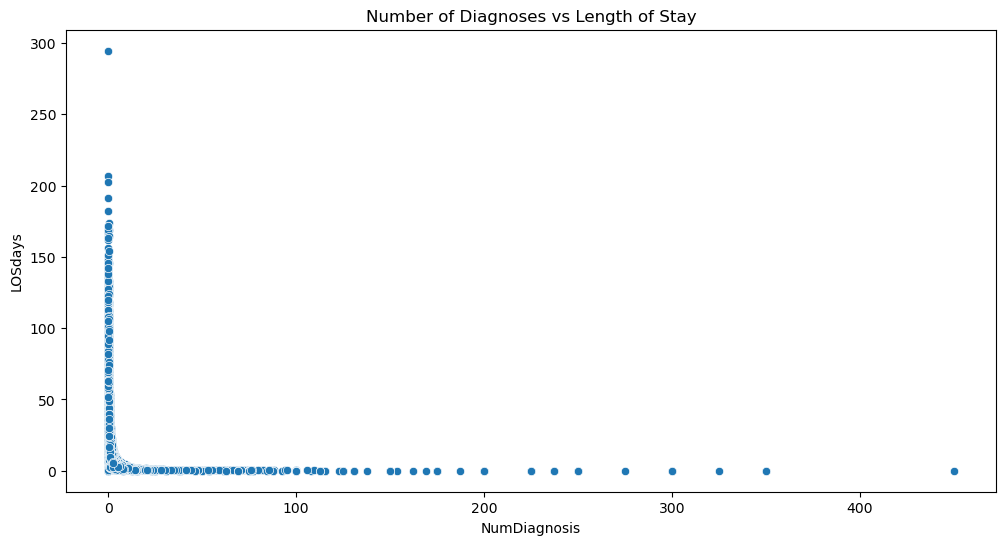

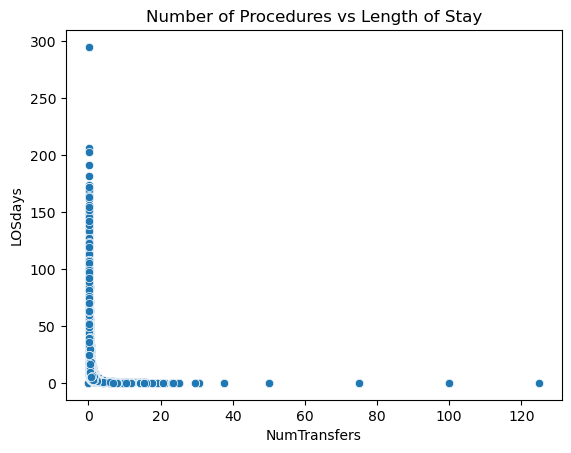

In [9]:
# Scatter plots to see relationship between number of diagnoses and procedures vs LOSdays
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='NumDiagnosis', y='LOSdays')
plt.title('Number of Diagnoses vs Length of Stay')
plt.show()

sns.scatterplot(data=df, x='NumTransfers', y='LOSdays')
plt.title('Number of Procedures vs Length of Stay')
plt.show()

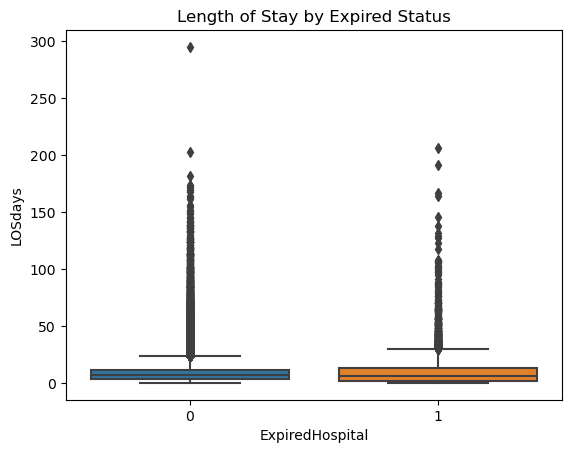

In [17]:
# Boxplot for LOSdays based on expired status
sns.boxplot(data=df, x='ExpiredHospital', y='LOSdays')
plt.title('Length of Stay by Expired Status')
plt.show()

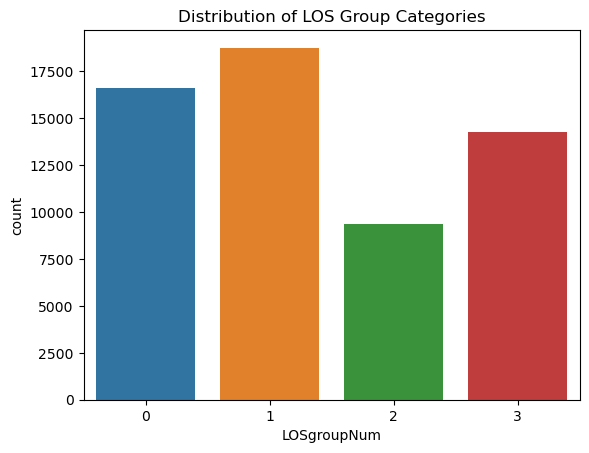

In [18]:
# Count plot of LOS group categories
sns.countplot(data=df, x='LOSgroupNum')
plt.title('Distribution of LOS Group Categories')
plt.show()